# Women cloth reviews prediction with multi nomial naive bayes

#Objective
>the multinomial naive Bayes classifier is suitable for classification with discrete feature (e.g. word count for text classification).the multinomial distribution normally requires interger feature counts. however ,in practice,fraction count such as tf-idf may also work.

#Data source
>there are some datasets available in these websites the given below
*   www.GitHub.com
*   www.Kaggle.com



#Import library

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data

In [152]:
df=pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv")

#Describe Data

In [153]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [154]:
df.tail()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [156]:
df.shape

(23486, 10)

In [157]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [158]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

#Data Visualization

<Axes: >

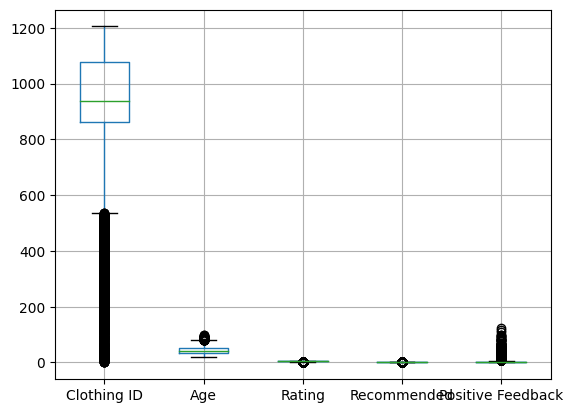

In [159]:
df.boxplot()

<Axes: >

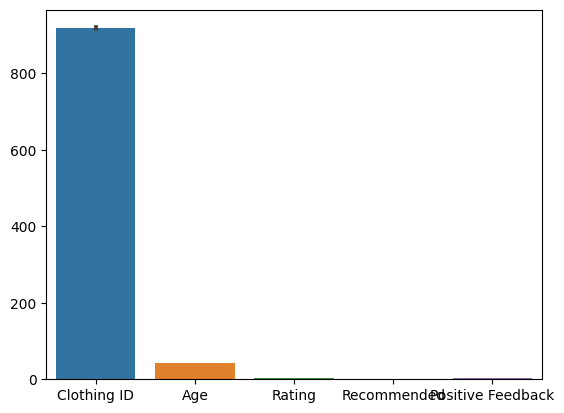

In [160]:
sns.barplot(df)

#Data preprocessing

In [161]:
#remove missing value
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [162]:
df[df["Review"]==""]=np.NaN

In [163]:
df["Review"].fillna("No Review",inplace=True)

In [164]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [165]:
df["Review"]

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object

#Define Target variables (y) and Feature Variables(x)

In [166]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [167]:
X=df["Review"]
y=df["Rating"]

In [168]:
df["Rating"].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

#Train test split

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,stratify=y,random_state=2529)

In [170]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16440,), (7046,), (16440,), (7046,))

In [171]:
####feature text conversion to token
from sklearn.feature_extraction.text import CountVectorizer

In [172]:
cv=CountVectorizer(lowercase=True,analyzer="word",ngram_range=(2,3),stop_words="english",max_features=5000)

In [173]:
X_train=cv.fit_transform(X_train)

In [174]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [175]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [176]:
X_test=cv.fit_transform(X_test)

In [177]:
cv.get_feature_names_out()


array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [178]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Modelling

In [179]:
from sklearn.naive_bayes import MultinomialNB

In [180]:
model=MultinomialNB()

In [181]:
model.fit(X_train,y_train)

MultinomialNB()

In [182]:
y_pred=model.predict(X_test)

In [183]:
y_pred.shape

(7046,)

In [184]:
y_pred

array([1., 5., 5., ..., 5., 5., 5.])

In [185]:
#get probability of each class
model.predict_proba(X_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

#Model Evaluation

In [186]:
from sklearn.metrics import confusion_matrix,classification_report

In [187]:
print(confusion_matrix(y_test,y_pred))

[[  15   13   45   36  144]
 [  43   43   86   85  213]
 [ 116   78  113  166  388]
 [ 166  108  194  336  719]
 [ 371  272  349  722 2225]]


In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.02      0.06      0.03       253
         2.0       0.08      0.09      0.09       470
         3.0       0.14      0.13      0.14       861
         4.0       0.25      0.22      0.23      1523
         5.0       0.60      0.56      0.58      3939

    accuracy                           0.39      7046
   macro avg       0.22      0.21      0.21      7046
weighted avg       0.42      0.39      0.40      7046



In [189]:
df["Rating"].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

In [190]:
df.replace({"Rating":{1:0,2:0,3:0,4:1,5:1}},inplace=True)

In [191]:
y=df["Rating"]
X=df["Review"]

#Prediction

In [192]:
y_pred=model.predict(X_test)

In [193]:
y_pred.shape

(7046,)

In [194]:
y_pred

array([1., 5., 5., ..., 5., 5., 5.])

In [195]:
model.predict_proba(X_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])


#Explaination
>This project is focused on building a prediction model. At first, the all required libraries and a test dataset are imported. The dataset was evaluated and pre processed to prepare for it for processing, then a portion of it was kept for testing and the rest was used to train the model. The model was used to get some prediction dataset. Finnaly, prediction accuracy was checked against the test dataset, some adjusment were made and the model was re-trained for better accuracy.